In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from sklearn import datasets

%matplotlib inline

## Part 1: Loading and Visualizing Data

(2000, 2)
(2000,)


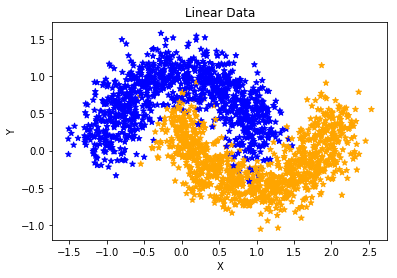

(1000,)
(1000, 2)


"(x_vals_train, y_vals_train) = datasets.make_circles(n_samples=350, factor=.5, noise=.1)\ny_vals_train = np.array([1 if y==1 else -1 for y in y_vals_train])\nprint(x_vals_train.shape)\nprint(y_vals_train.shape)\nplt.scatter(x_vals_train[:,0], x_vals_train[:,1], c=colors, marker='*')\nplt.title('Linear Data')\nplt.xlabel('X')\nplt.ylabel('Y')\nplt.show()"

In [2]:
row_data = np.genfromtxt('../simdata/moon_data_train.csv', delimiter=',')
y_vals_train = np.array([1 if rowD==1 else -1 for rowD in row_data[:, 0]])
x_vals_train = row_data[:, 1:]
print(x_vals_train.shape)
print(y_vals_train.shape)

colors = ['orange' if label==1 else 'blue' for label in y_vals_train]
plt.scatter(x_vals_train[:,0], x_vals_train[:,1], c=colors, marker='*')
plt.title('Linear Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

row_data = np.genfromtxt('../simdata/moon_data_eval.csv', delimiter=',')
y_vals_test = np.array([1 if rowD==1 else -1 for rowD in row_data[:, 0]])
x_vals_test = row_data[:, 1:]
print(y_vals_test.shape)
print(x_vals_test.shape)

"""
iris = datasets.load_iris()
x_vals_train = np.array([[x[0], x[3]] for x in iris.data])
y_vals_train = np.array([1 if y==0 else -1 for y in iris.target])
print(x_vals_train.shape)
print(y_vals_train.shape)

colors = ['orange' if label==1 else 'blue' for label in y_vals_train]
plt.scatter(x_vals_train[:,0], x_vals_train[:,1], c=colors, marker='*')
plt.title('Linear Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()"""


# Generate non-lnear data# Gener 
"""(x_vals_train, y_vals_train) = datasets.make_circles(n_samples=350, factor=.5, noise=.1)
y_vals_train = np.array([1 if y==1 else -1 for y in y_vals_train])
print(x_vals_train.shape)
print(y_vals_train.shape)
plt.scatter(x_vals_train[:,0], x_vals_train[:,1], c=colors, marker='*')
plt.title('Linear Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()"""

## Part 2: Training Linear SVM

In [98]:
tf.logging.set_verbosity(tf.logging.INFO)

batch_size = 100

x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

model_output = tf.subtract(tf.matmul(x_data, A), b)

l2_norm = tf.reduce_sum(tf.square(A))

alpha = tf.constant([0.01])
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()

loss_vec = []
train_accuracy = []
test_accuracy = []

with tf.Session() as sess:
    sess.run(init)

    # Training loop
    for i in range(20000):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = x_vals_train[rand_index]
        rand_y = np.transpose([y_vals_train[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        
        train_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
        train_accuracy.append(train_acc_temp)
        
        test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
        test_accuracy.append(test_acc_temp)
        
        if (i+1)%1000 == 0:
            print('Step #{} A={}, b={}'.format(i+1, str(sess.run(A)), str(sess.run(b))))
            print('Loss = {}'.format(temp_loss))
            
    [[a1], [a2]] = sess.run(A)
    [[b]] = sess.run(b)
    slope = -a2/a1
    y_intercept = b/a1

Step #1000 A=[[ 0.7668491]
 [-1.33055  ]], b=[[0.09467408]]
Loss = [0.3135379]
Step #2000 A=[[ 0.7364228]
 [-1.6820494]], b=[[-0.04442591]]
Loss = [0.36602297]
Step #3000 A=[[ 0.71963215]
 [-1.8056985 ]], b=[[-0.083226]]
Loss = [0.2702246]
Step #4000 A=[[ 0.7150409]
 [-1.8398448]], b=[[-0.11232603]]
Loss = [0.37731108]
Step #5000 A=[[ 0.7174738]
 [-1.8584747]], b=[[-0.10692601]]
Loss = [0.31977114]
Step #6000 A=[[ 0.72104675]
 [-1.8701005 ]], b=[[-0.11452603]]
Loss = [0.28458938]
Step #7000 A=[[ 0.7257181]
 [-1.8702153]], b=[[-0.11192601]]
Loss = [0.34429017]
Step #8000 A=[[ 0.71973765]
 [-1.8694142 ]], b=[[-0.10932589]]
Loss = [0.27696812]
Step #9000 A=[[ 0.7167939]
 [-1.8721929]], b=[[-0.12072589]]
Loss = [0.3958217]
Step #10000 A=[[ 0.72075194]
 [-1.8733084 ]], b=[[-0.11872584]]
Loss = [0.38997248]
Step #11000 A=[[ 0.7113595]
 [-1.8738406]], b=[[-0.12082573]]
Loss = [0.30146068]
Step #12000 A=[[ 0.73269325]
 [-1.8699507 ]], b=[[-0.1130258]]
Loss = [0.41275835]
Step #13000 A=[[ 0.718

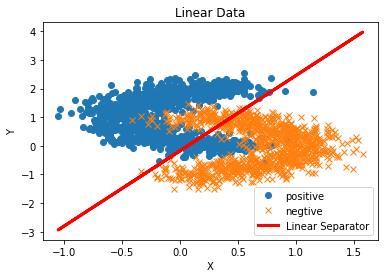

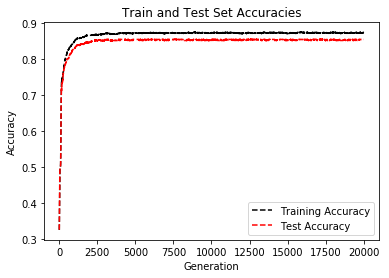

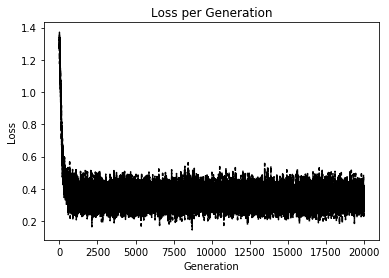

In [99]:
best_fit = []

x1_vals = [d[1] for d in x_vals_train]

for i in x1_vals:
    best_fit.append(slope*i+y_intercept)

positive_x = [d[1] for i, d in enumerate(x_vals_train) if y_vals_train[i] == 1]
positive_y = [d[0] for i, d in enumerate(x_vals_train) if y_vals_train[i] == 1]
negtive_x = [d[1] for i, d in enumerate(x_vals_train) if y_vals_train[i] == -1]
negtive_y = [d[0] for i, d in enumerate(x_vals_train) if y_vals_train[i] == -1]

plt.plot(positive_x, positive_y, 'o', label='positive')
plt.plot(negtive_x, negtive_y, 'x', label='negtive')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.legend(loc='lower right')
plt.title('Linear Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.plot(train_accuracy, 'k--', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.show()

plt.plot(loss_vec, 'k--')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

## Part 3: Training SVM with RBF Kernel

In [6]:
# Declare batch size
batch_size = 2000

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)

# Create variables for svm
b = tf.Variable(tf.random_normal(shape=[1,batch_size]))

# Apply kernel
# Linear Kernel
# my_kernel = tf.matmul(x_data, tf.transpose(x_data))

# Gaussian (RBF) kernel
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_dists = tf.add(tf.subtract(dist, tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))


# Compute SVM Model# Compu 
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_term, second_term))


# Create Prediction Kernel# Creat 
# Linear prediction kernel
# my_kernel = tf.matmul(x_data, tf.transpose(prediction_grid))

# Gaussian (RBF) prediction kernel
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target),b), pred_kernel)
prediction = tf.sign(prediction_output-tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))


# Declare optimizer# Declar 
my_opt = tf.train.GradientDescentOptimizer(0.002)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()

loss_vec = []
batch_accuracy = []
grid_predictions = None

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = x_vals_train[rand_index]
        rand_y = np.transpose([y_vals_train[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)

        acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x,
                                                 y_target: rand_y,
                                                 prediction_grid:rand_x})
        batch_accuracy.append(acc_temp)

        if (i+1)%250==0:
            print('Step #' + str(i+1))
            print('Loss = ' + str(temp_loss))
            
    # Create a mesh to plot points in
    x_min, x_max = x_vals_train[:, 0].min() - 1, x_vals_train[:, 0].max() + 1
    y_min, y_max = x_vals_train[:, 1].min() - 1, x_vals_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    print(grid_points.shape)
    [grid_predictions] = sess.run(prediction, feed_dict={x_data: x_vals_train,
                                                       y_target: np.transpose([y_vals_train]),
                                                       prediction_grid: grid_points})
    grid_predictions = grid_predictions.reshape(xx.shape)

Step #250
Loss = 216.58313
Step #500
Loss = 22.036118
Step #750
Loss = -16.395412
Step #1000
Loss = -19.66897
(70296, 2)


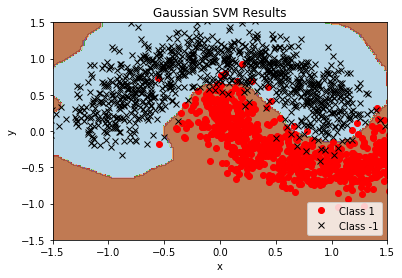

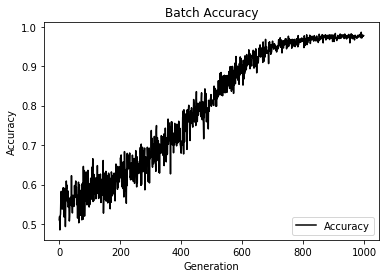

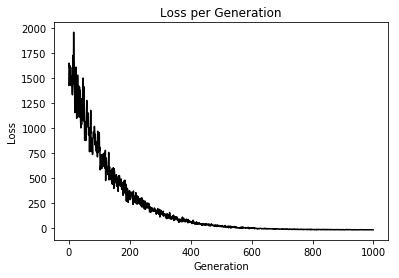

In [7]:
# Plot points and grid
class1_x = [x[0] for i,x in enumerate(x_vals_train) if y_vals_train[i]==1]
class1_y = [x[1] for i,x in enumerate(x_vals_train) if y_vals_train[i]==1]
class2_x = [x[0] for i,x in enumerate(x_vals_train) if y_vals_train[i]==-1]
class2_y = [x[1] for i,x in enumerate(x_vals_train) if y_vals_train[i]==-1]

plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='Class 1')
plt.plot(class2_x, class2_y, 'kx', label='Class -1')
plt.title('Gaussian SVM Results')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

# Plot batch accuracy
plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()